In [1]:
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
dfs = glob('capstone_1/checkins/*')
dfs

['capstone_1/checkins/df_12',
 'capstone_1/checkins/df_0',
 'capstone_1/checkins/df_7',
 'capstone_1/checkins/df_9',
 'capstone_1/checkins/df_8',
 'capstone_1/checkins/df_6',
 'capstone_1/checkins/df_11',
 'capstone_1/checkins/df_10',
 'capstone_1/checkins/df_4',
 'capstone_1/checkins/df_3',
 'capstone_1/checkins/df_2',
 'capstone_1/checkins/df_5']

In [189]:
biggie = pd.concat([pd.read_csv(df) for df in dfs], ignore_index=True)

In [190]:
print(biggie.shape)
biggie.columns

(1571140, 27)


Index(['Unnamed: 0', 'checkin_id', 'beer.bid', 'user.uid', 'rating_score',
       'beer.beer_abv', 'brewery.brewery_name', 'beer.beer_name',
       'beer.beer_style', 'brewery.brewery_id', 'brewery.brewery_type',
       'brewery.country_name', 'brewery.location.brewery_city',
       'brewery.location.brewery_state', 'brewery.location.lat',
       'brewery.location.lng', 'user.user_name', 'venue.categories.items',
       'venue.location.lat', 'venue.location.lng', 'venue.location.venue_city',
       'venue.location.venue_country', 'venue.location.venue_state',
       'venue.primary_category', 'venue.venue_id', 'checkin_comment',
       'created_at'],
      dtype='object')

In [13]:
sum(biggie['beer.beer_style'].apply(lambda x: x.startswith('IPA')))

751526

In [12]:
biggie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1571140 entries, 0 to 1571139
Data columns (total 27 columns):
Unnamed: 0                        1571140 non-null int64
checkin_id                        1571140 non-null int64
beer.bid                          1571140 non-null int64
user.uid                          1571140 non-null int64
rating_score                      1571140 non-null float64
beer.beer_abv                     1571140 non-null float64
brewery.brewery_name              1571140 non-null object
beer.beer_name                    1571140 non-null object
beer.beer_style                   1571140 non-null object
brewery.brewery_id                1571140 non-null int64
brewery.brewery_type              1571140 non-null object
brewery.country_name              1571140 non-null object
brewery.location.brewery_city     1554436 non-null object
brewery.location.brewery_state    1546325 non-null object
brewery.location.lat              1571140 non-null float64
brewery.location.ln

In [21]:
np.count_nonzero(biggie['rating_score']) / biggie.shape[0]

0.9072692439884416

In [22]:
min(score for score in biggie['rating_score'] if score)

0.25

In [11]:
%matplotlib inline

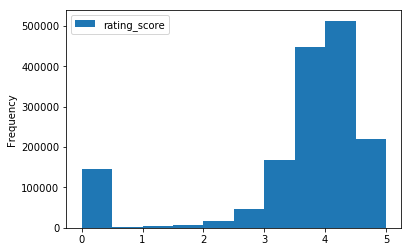

In [8]:
biggie[['rating_score']].plot(kind='hist')
plt.show()

In [14]:
sample_checkins = biggie.sample(1000)
sample_checkins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1237851 to 601871
Data columns (total 27 columns):
Unnamed: 0                        1000 non-null int64
checkin_id                        1000 non-null int64
beer.bid                          1000 non-null int64
user.uid                          1000 non-null int64
rating_score                      1000 non-null float64
beer.beer_abv                     1000 non-null float64
brewery.brewery_name              1000 non-null object
beer.beer_name                    1000 non-null object
beer.beer_style                   1000 non-null object
brewery.brewery_id                1000 non-null int64
brewery.brewery_type              1000 non-null object
brewery.country_name              1000 non-null object
brewery.location.brewery_city     993 non-null object
brewery.location.brewery_state    987 non-null object
brewery.location.lat              1000 non-null float64
brewery.location.lng              1000 non-null float64
user.use

In [29]:
sample_checkins.reset_index(drop=True, inplace=True)
sample_checkins.head(3)

,Unnamed: 0,checkin_id,beer.bid,user.uid,rating_score,beer.beer_abv,brewery.brewery_name,beer.beer_name,beer.beer_style,brewery.brewery_id,...,venue.categories.items,venue.location.lat,venue.location.lng,venue.location.venue_city,venue.location.venue_country,venue.location.venue_state,venue.primary_category,venue.venue_id,checkin_comment,created_at
0,112706,815404364,331215,2997378,0.0,5.5,Half Acre Beer Company,Pony,Pilsner - German,1862,...,"[{'category_key': 'pizza_place', 'category_nam...",47.6495,-122.349,Seattle,United States,WA,Food,7058052.0,NaN,"Thu, 10 Oct 2019 23:42:00 +0000"
1,46655,801234367,3223488,5958535,4.0,6.0,Sierra Nevada Brewing Co.,Oktoberfest - Bitburger Braugruppe (2019),Märzen,1142,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Fri, 06 Sep 2019 01:15:31 +0000"
2,106882,801627521,2378624,72490,0.0,6.0,Peabody Heights Brewery,Abell Hands,Pale Ale - American,224255,...,"[{'category_key': 'seafood_restaurant', 'categ...",39.6043,-76.115,Port Deposit,United States,MD,Food,109538.0,NaN,"Fri, 06 Sep 2019 22:41:19 +0000"


In [54]:
sample_checkins.loc[0, 'venue.primary_category']

nan

In [35]:
pd.isnull(sample_checkins.loc[1, 'venue.categories.items'])

True

In [50]:
import ast  # the json_normalize() returned a string repr of a list, so need this to 'un-string' it

def venuecat(venuecell):
    if pd.isnull(venuecell):
        # empty list to eval to False
        return list()
    # list with primary category first
    try:
        venuecell = ast.literal_eval(venuecell)
        return [item['category_key'] for item in venuecell if item['is_primary']] + \
               [item['category_key'] for item in venuecell if not item['is_primary']]
    except TypeError:
        print(venuecell)
        return []
    

In [51]:
sample_checkins['venue.type'] = sample_checkins['venue.categories.items'].apply(lambda x: venuecat(x))

In [71]:
sample_checkins['rating_score'][55:65]

55    3.25
56    4.25
57    4.00
58    4.00
59    4.00
60    3.75
61    4.00
62    4.25
63    3.25
64    0.00
Name: rating_score, dtype: float64

In [73]:
sample_checkins.drop('venue.categories.items', inplace=True, axis=1)

In [74]:
sample_checkins.drop('Unnamed: 0', axis=1, inplace=True)

In [75]:
sample_checkins.head()

,checkin_id,beer.bid,user.uid,rating_score,beer.beer_abv,brewery.brewery_name,beer.beer_name,beer.beer_style,brewery.brewery_id,brewery.brewery_type,...,venue.location.lat,venue.location.lng,venue.location.venue_city,venue.location.venue_country,venue.location.venue_state,venue.primary_category,venue.venue_id,checkin_comment,created_at,venue.type
0,815404364,331215,2997378,0.0,5.5,Half Acre Beer Company,Pony,Pilsner - German,1862,Regional Brewery,...,47.6495,-122.3490,Seattle,United States,WA,Food,7058052.0,NaN,"Thu, 10 Oct 2019 23:42:00 +0000","[pizza_place, beer_bar]"
1,801234367,3223488,5958535,4.0,6.0,Sierra Nevada Brewing Co.,Oktoberfest - Bitburger Braugruppe (2019),Märzen,1142,Regional Brewery,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Fri, 06 Sep 2019 01:15:31 +0000",[]
2,801627521,2378624,72490,0.0,6.0,Peabody Heights Brewery,Abell Hands,Pale Ale - American,224255,Micro Brewery,...,39.6043,-76.1150,Port Deposit,United States,MD,Food,109538.0,NaN,"Fri, 06 Sep 2019 22:41:19 +0000","[seafood_restaurant, american_restaurant]"
3,731686382,3123862,1417868,4.0,4.9,Backpocket Brewing,Kitty Lime Pie,Sour - Gose - Fruited,14975,Micro Brewery,...,42.0202,-91.6656,Cedar Rapids,United States,IA,Nightlife Spot,8731918.0,NaN,"Wed, 03 Apr 2019 20:42:36 +0000",[beer_bar]
4,467952253,594015,3473594,0.0,7.8,Toppling Goliath Brewing Co.,King Sue,IPA - Imperial / Double New England,7532,Micro Brewery,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Wed, 21 Jun 2017 22:30:07 +0000",[]


In [76]:
# save to push to github for sample viewing
sample_checkins.to_csv('sample_checkins.csv')

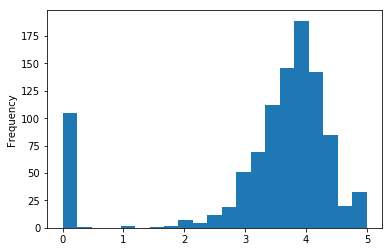

In [89]:
sample_checkins.rating_score.plot(kind='hist', bins=21)

In [90]:
sample_checkins.rating_score.value_counts()

4.00    189
3.75    145
4.25    142
3.50    112
0.00    105
4.50     85
3.25     69
3.00     51
5.00     33
4.75     20
2.75     19
2.50     12
2.00      7
2.25      4
1.00      2
1.75      2
0.25      1
1.50      1
3.60      1
Name: rating_score, dtype: int64

In [84]:
sum(sample_checkins['beer.beer_style'].apply(lambda x: x.startswith('IPA')))

487

### Let's see what it merges well with

In [92]:
sample_beers = pd.read_csv('capstone_1/userbeers0.csv')
# This is the df that has the untappd global beer ratings plus beer descriptions
sample_beers.columns

Index(['Unnamed: 0', 'beer.beer_abv', 'beer.beer_description', 'beer.beer_ibu',
       'beer.beer_label', 'beer.beer_name', 'beer.beer_slug',
       'beer.beer_style', 'beer.bid', 'beer.created_at', 'beer.has_had',
       'beer.rating_count', 'beer.rating_score', 'brewery.brewery_active',
       'brewery.brewery_id', 'brewery.brewery_label', 'brewery.brewery_name',
       'brewery.brewery_page_url', 'brewery.brewery_slug',
       'brewery.brewery_type', 'brewery.contact.facebook',
       'brewery.contact.instagram', 'brewery.contact.twitter',
       'brewery.contact.url', 'brewery.country_name',
       'brewery.location.brewery_city', 'brewery.location.brewery_state',
       'brewery.location.lat', 'brewery.location.lng', 'count',
       'first_checkin_id', 'first_created_at', 'first_had', 'rating_score',
       'recent_checkin_id', 'recent_created_at', 'recent_created_at_timezone',
       'user_auth_rating_score'],
      dtype='object')

In [93]:
sample_beers.loc[:5,['beer.beer_name', 'beer.bid','beer.beer_style',
                     'beer.rating_score','beer.beer_description','rating_score']]

,beer.beer_name,beer.bid,beer.beer_style,beer.rating_score,beer.beer_description,rating_score
0,My Own Private Idaho,3467088,IPA - Session / India Session Ale,3.60516,Session ale with a subtle malt bill and fresh ...,3.75
1,Handup IPA,3311276,IPA - American,3.65708,"West coast IPA with light malt character, brig...",3.75
2,Mad Respect,1445432,IPA - American,4.13043,NaN,4.00
3,Return to Space,2655469,IPA - New England,4.11855,Return to Space was inspired by two of our fav...,4.25
4,Denim Vest-pionage West Coast IPA,3257257,IPA - American,3.87377,This west coast style IPA utilizes 5 pounds of...,4.00
5,Unplug IPA,3218663,IPA - American,3.83902,West coast style IPA with flavors and aromas o...,3.75


In [95]:
len(sample_beers)

220598

#### How many of the 1000 sample_checkins are matched to this larger table?

In [96]:
id_desc = sample_beers[['beer.bid', 'beer.rating_score','beer.beer_description']]

In [108]:
# Make these unique for current merge
id_desc = id_desc.drop_duplicates()

In [109]:
# how many unique rows
len(id_desc)

122029

In [110]:
# Inner join on beer.bid to add global rating and description where poss.
matches = sample_checkins.merge(id_desc)

In [111]:
matches.head()

,checkin_id,beer.bid,user.uid,rating_score,beer.beer_abv,brewery.brewery_name,beer.beer_name,beer.beer_style,brewery.brewery_id,brewery.brewery_type,...,venue.location.venue_city,venue.location.venue_country,venue.location.venue_state,venue.primary_category,venue.venue_id,checkin_comment,created_at,venue.type,beer.rating_score,beer.beer_description
0,815404364,331215,2997378,0.0,5.5,Half Acre Beer Company,Pony,Pilsner - German,1862,Regional Brewery,...,Seattle,United States,WA,Food,7058052.0,NaN,"Thu, 10 Oct 2019 23:42:00 +0000","[pizza_place, beer_bar]",3.50751,Pony Pilsner is a firm take on the classic Ger...
1,815404364,331215,2997378,0.0,5.5,Half Acre Beer Company,Pony,Pilsner - German,1862,Regional Brewery,...,Seattle,United States,WA,Food,7058052.0,NaN,"Thu, 10 Oct 2019 23:42:00 +0000","[pizza_place, beer_bar]",3.50753,Pony Pilsner is a firm take on the classic Ger...
2,801234367,3223488,5958535,4.0,6.0,Sierra Nevada Brewing Co.,Oktoberfest - Bitburger Braugruppe (2019),Märzen,1142,Regional Brewery,...,NaN,NaN,NaN,NaN,NaN,NaN,"Fri, 06 Sep 2019 01:15:31 +0000",[],3.77989,"It’s the ultimate season of revelry, so we tea..."
3,801234367,3223488,5958535,4.0,6.0,Sierra Nevada Brewing Co.,Oktoberfest - Bitburger Braugruppe (2019),Märzen,1142,Regional Brewery,...,NaN,NaN,NaN,NaN,NaN,NaN,"Fri, 06 Sep 2019 01:15:31 +0000",[],3.77977,"It’s the ultimate season of revelry, so we tea..."
4,801234367,3223488,5958535,4.0,6.0,Sierra Nevada Brewing Co.,Oktoberfest - Bitburger Braugruppe (2019),Märzen,1142,Regional Brewery,...,NaN,NaN,NaN,NaN,NaN,NaN,"Fri, 06 Sep 2019 01:15:31 +0000",[],3.77974,"It’s the ultimate season of revelry, so we tea..."


In [112]:
matches.shape

(1327, 28)

So apparently as the global rating changes slightly from checkin to checkin, that makes rows unique

In [113]:
matches.drop_duplicates('checkin_id', keep='first', inplace=True)  # The keep='first' is arbitrary
print(matches.shape)
matches.head()

(720, 28)


,checkin_id,beer.bid,user.uid,rating_score,beer.beer_abv,brewery.brewery_name,beer.beer_name,beer.beer_style,brewery.brewery_id,brewery.brewery_type,...,venue.location.venue_city,venue.location.venue_country,venue.location.venue_state,venue.primary_category,venue.venue_id,checkin_comment,created_at,venue.type,beer.rating_score,beer.beer_description
0,815404364,331215,2997378,0.0,5.5,Half Acre Beer Company,Pony,Pilsner - German,1862,Regional Brewery,...,Seattle,United States,WA,Food,7058052.0,NaN,"Thu, 10 Oct 2019 23:42:00 +0000","[pizza_place, beer_bar]",3.50751,Pony Pilsner is a firm take on the classic Ger...
2,801234367,3223488,5958535,4.0,6.0,Sierra Nevada Brewing Co.,Oktoberfest - Bitburger Braugruppe (2019),Märzen,1142,Regional Brewery,...,NaN,NaN,NaN,NaN,NaN,NaN,"Fri, 06 Sep 2019 01:15:31 +0000",[],3.77989,"It’s the ultimate season of revelry, so we tea..."
5,801276636,3223488,9337,0.0,6.0,Sierra Nevada Brewing Co.,Oktoberfest - Bitburger Braugruppe (2019),Märzen,1142,Regional Brewery,...,Santa Ana,United States,CA,Nightlife Spot,780494.0,NaN,"Fri, 06 Sep 2019 03:04:41 +0000",[dive_bar],3.77989,"It’s the ultimate season of revelry, so we tea..."
8,731686382,3123862,1417868,4.0,4.9,Backpocket Brewing,Kitty Lime Pie,Sour - Gose - Fruited,14975,Micro Brewery,...,Cedar Rapids,United States,IA,Nightlife Spot,8731918.0,NaN,"Wed, 03 Apr 2019 20:42:36 +0000",[beer_bar],3.81425,NaN
9,467952253,594015,3473594,0.0,7.8,Toppling Goliath Brewing Co.,King Sue,IPA - Imperial / Double New England,7532,Micro Brewery,...,NaN,NaN,NaN,NaN,NaN,NaN,"Wed, 21 Jun 2017 22:30:07 +0000",[],4.42120,This lusciously hazy double IPA gains its hint...


In [115]:
# I see some duped beers there. Is that random from the sampled 1000 checkins, out of 1.5 Mil?
sample_checkins[sample_checkins['beer.bid'] == 3223488]

,checkin_id,beer.bid,user.uid,rating_score,beer.beer_abv,brewery.brewery_name,beer.beer_name,beer.beer_style,brewery.brewery_id,brewery.brewery_type,...,venue.location.lat,venue.location.lng,venue.location.venue_city,venue.location.venue_country,venue.location.venue_state,venue.primary_category,venue.venue_id,checkin_comment,created_at,venue.type
1,801234367,3223488,5958535,4.0,6.0,Sierra Nevada Brewing Co.,Oktoberfest - Bitburger Braugruppe (2019),Märzen,1142,Regional Brewery,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Fri, 06 Sep 2019 01:15:31 +0000",[]
124,801276636,3223488,9337,0.0,6.0,Sierra Nevada Brewing Co.,Oktoberfest - Bitburger Braugruppe (2019),Märzen,1142,Regional Brewery,...,33.7609,-117.869,Santa Ana,United States,CA,Nightlife Spot,780494.0,NaN,"Fri, 06 Sep 2019 03:04:41 +0000",[dive_bar]


hmmm, random that it showed up in first 5 rows of matched

In [116]:
len(sample_checkins['beer.bid'].unique())  # ok well apparently this is the birthday paradox:
         # If you randomly sample 1000 beers from the list of 1.5 Mil checkins, you'll get 23 dupes

977

In [117]:
len(matches['beer.bid'].unique()) 

698

#### Looks like about 70% of the 1.5 M will have a global rating from the first 220K userbeers.

In [120]:
matches[matches.rating_score > 0].head(10)

,checkin_id,beer.bid,user.uid,rating_score,beer.beer_abv,brewery.brewery_name,beer.beer_name,beer.beer_style,brewery.brewery_id,brewery.brewery_type,...,venue.location.venue_city,venue.location.venue_country,venue.location.venue_state,venue.primary_category,venue.venue_id,checkin_comment,created_at,venue.type,beer.rating_score,beer.beer_description
2,801234367,3223488,5958535,4.00,6.0,Sierra Nevada Brewing Co.,Oktoberfest - Bitburger Braugruppe (2019),Märzen,1142,Regional Brewery,...,NaN,NaN,NaN,NaN,NaN,NaN,"Fri, 06 Sep 2019 01:15:31 +0000",[],3.77989,"It’s the ultimate season of revelry, so we tea..."
8,731686382,3123862,1417868,4.00,4.9,Backpocket Brewing,Kitty Lime Pie,Sour - Gose - Fruited,14975,Micro Brewery,...,Cedar Rapids,United States,IA,Nightlife Spot,8731918.0,NaN,"Wed, 03 Apr 2019 20:42:36 +0000",[beer_bar],3.81425,NaN
12,767285735,3156308,425580,2.75,9.5,Brewery Ommegang,Game of Thrones: For the Throne,Belgian Strong Golden Ale,249,Regional Brewery,...,NaN,NaN,NaN,NaN,NaN,NaN,"Sun, 23 Jun 2019 00:56:48 +0000",[],3.79065,Golden ale co-fermented with Pinot Grigio and ...
15,670551001,77509,29596,3.75,7.8,Toppling Goliath Brewing Co.,Hopsmack!,IPA - Imperial / Double,7532,Micro Brewery,...,Independence,United States,IA,Residence,545631.0,NaN,"Thu, 01 Nov 2018 20:09:27 +0000",[home_private],4.20955,Giant aromas of pineapple and tropical fruit j...
17,791830110,2498961,4174460,4.50,7.8,Bissell Brothers Brewing Company,Preserve & Protect,IPA - New England,32943,Micro Brewery,...,Wells,United States,ME,Food,2007273.0,NaN,"Thu, 15 Aug 2019 20:30:15 +0000","[donut_shop, breakfast_spot, bakery]",4.26318,"Preserve & Protect, a 7.8% IPA built off the b..."
19,776850577,3249910,2882933,3.75,5.2,Devil Wind Brewing,Old 807,IPA - English,387132,Micro Brewery,...,Dayton,United States,OH,Outdoors & Recreation,350622.0,NaN,"Sat, 13 Jul 2019 21:20:05 +0000","[park, historic_site]",3.57265,NaN
20,775772923,3292112,138446,4.00,4.4,Dirty Couch Brewing,Founder And the Argumentist: Passion Fruit,Sour - Fruited,192460,Micro Brewery,...,Seattle,United States,WA,Nightlife Spot,7616553.0,NaN,"Fri, 12 Jul 2019 03:12:01 +0000",[brewery],4.05699,Blended sour farmhouse ale with passion fruit.
21,795478052,3276699,2628278,4.25,7.0,Odin Brewing Company,Fog Dragon Hazy IPA,IPA - New England,5498,Micro Brewery,...,Tukwila,United States,WA,Nightlife Spot,2037813.0,NaN,"Fri, 23 Aug 2019 22:54:11 +0000",[brewery],3.81282,NaN
22,719937904,1143686,1497516,4.00,6.8,Green Bench Brewing Co,Sunshine City IPA,IPA - American,60255,Micro Brewery,...,Tallahassee,United States,FL,Food,4844922.0,NaN,"Tue, 05 Mar 2019 18:18:05 +0000","[american_restaurant, southern_soul_food_resta...",3.83552,"Packed with hop flavor and aroma, we double dr..."
25,710767388,6477,5738546,3.75,4.5,North Coast Brewing Company,Blue Star,Wheat Beer - American Pale Wheat,919,Regional Brewery,...,Chapel Hill,United States,NC,Nightlife Spot,4263258.0,Delicious,"Sat, 09 Feb 2019 22:55:55 +0000","[beer_bar, wine_bar, pizza_place]",3.44476,Brewed in the style of the American Craft Beer...


### And what matches that from BreweryDB?

In [121]:
# strip down brewery names
def strip_brewery(name):
    result = name.strip()
    if result.endswith(' Company'):
        result = result[:-8]
    elif result.endswith(' Co.'):
        result = result[:-4]
    elif result.endswith(' Co'):
        result = result[:-3]
    if result.endswith(' Brewery') or result.endswith(' Brewing'):
        result = result[:-8]
    return result.strip().lower()

#strip down IPA names
def strip_beer(name):
    result = name.strip()
    if result.endswith(' IPA'):
        result = result[:-4]
    elif result.endswith(' India Pale Ale'):
        result = result[:-15]
    return result.lower().strip()

In [122]:
# for example:
strip_brewery('AbC Brewery Company ')

'abc'

In [123]:
# for example:
strip_beer('The bad IPA ')

'the bad'

In [127]:
matches['stripped_name'] = matches.apply(lambda row: 
                                         strip_brewery(row['brewery.brewery_name']) + ' ' +
                                         strip_beer(row['beer.beer_name']), axis=1)

In [128]:
matches.head()

,checkin_id,beer.bid,user.uid,rating_score,beer.beer_abv,brewery.brewery_name,beer.beer_name,beer.beer_style,brewery.brewery_id,brewery.brewery_type,...,venue.location.venue_country,venue.location.venue_state,venue.primary_category,venue.venue_id,checkin_comment,created_at,venue.type,beer.rating_score,beer.beer_description,stripped_name
0,815404364,331215,2997378,0.0,5.5,Half Acre Beer Company,Pony,Pilsner - German,1862,Regional Brewery,...,United States,WA,Food,7058052.0,NaN,"Thu, 10 Oct 2019 23:42:00 +0000","[pizza_place, beer_bar]",3.50751,Pony Pilsner is a firm take on the classic Ger...,half acre beer pony
2,801234367,3223488,5958535,4.0,6.0,Sierra Nevada Brewing Co.,Oktoberfest - Bitburger Braugruppe (2019),Märzen,1142,Regional Brewery,...,NaN,NaN,NaN,NaN,NaN,"Fri, 06 Sep 2019 01:15:31 +0000",[],3.77989,"It’s the ultimate season of revelry, so we tea...",sierra nevada oktoberfest - bitburger braugrup...
5,801276636,3223488,9337,0.0,6.0,Sierra Nevada Brewing Co.,Oktoberfest - Bitburger Braugruppe (2019),Märzen,1142,Regional Brewery,...,United States,CA,Nightlife Spot,780494.0,NaN,"Fri, 06 Sep 2019 03:04:41 +0000",[dive_bar],3.77989,"It’s the ultimate season of revelry, so we tea...",sierra nevada oktoberfest - bitburger braugrup...
8,731686382,3123862,1417868,4.0,4.9,Backpocket Brewing,Kitty Lime Pie,Sour - Gose - Fruited,14975,Micro Brewery,...,United States,IA,Nightlife Spot,8731918.0,NaN,"Wed, 03 Apr 2019 20:42:36 +0000",[beer_bar],3.81425,NaN,backpocket kitty lime pie
9,467952253,594015,3473594,0.0,7.8,Toppling Goliath Brewing Co.,King Sue,IPA - Imperial / Double New England,7532,Micro Brewery,...,NaN,NaN,NaN,NaN,NaN,"Wed, 21 Jun 2017 22:30:07 +0000",[],4.42120,This lusciously hazy double IPA gains its hint...,toppling goliath king sue


Load the brewerydb frames

In [130]:
bdb_ipas = pd.read_csv('capstone_1/bdb_ipa_df.csv')
bdb_ipas.shape


(14774, 10)

In [148]:
bdb_ipas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14774 entries, 0 to 14773
Data columns (total 10 columns):
Unnamed: 0     14774 non-null int64
id             14774 non-null object
breweries      14774 non-null object
name           14774 non-null object
abv            13821 non-null float64
description    10437 non-null object
ibu            7256 non-null float64
ingredients    5414 non-null object
styleId        14774 non-null int64
untap          14774 non-null int64
dtypes: float64(2), int64(3), object(5)
memory usage: 1.1+ MB


In [132]:
bdb_ipas.head()

,Unnamed: 0,id,breweries,name,abv,description,ibu,ingredients,styleId,untap
0,0,iCRjjI,"[{'id': 'VDMEV7', 'name': 'Boulevard Brewing C...",21st Anniversary Fresh Hop Pale Ale,7.4,"In November of 1989, John McDonald loaded his ...",40.0,{},26,0
1,1,GbGphv,"[{'id': 'yXL9TY', 'name': 'Land-Grant Brewing ...","30,000 Acres",5.6,This limited edition Pale Ale features fresh S...,44.0,{},26,0
2,2,g1Bmuz,"[{'id': 'HUCz2L', 'name': 'Fullsteam Brewery',...",300 Mile,NaN,A Fullsteam truly local experiment — a beer ma...,NaN,{},26,0
3,3,2rvu5K,"[{'id': '564ZPt', 'name': 'Blue Blood Brewing ...",543 SkullCreek Fresh Hopped Pale Ale,NaN,NaN,NaN,{},26,0
4,4,SWYfSs,"[{'id': 'LGSXeN', 'name': 'Powell Street Craft...",95 Pounds of Wethop Goodness,6.0,This Pale Ale was brewed with Wethops in mind....,30.0,{},26,0


### Ahh, need to unpack those weird brewery lists still, as with the venues, earlier

In [143]:
cell=ast.literal_eval(bdb_ipas.breweries[0])

In [144]:
cell[0]['name']

'Boulevard Brewing Company'

In [145]:
def brewname(brewery_cell):
    '''un_string the json_normalization of the bdb breweries value'''
    brewery_cell = ast.literal_eval(brewery_cell)
    return brewery_cell[0]['name']  # only use first brewery name, in case of collaboration beers

In [158]:
bdb_ipas['beer'] = bdb_ipas.apply(lambda row: strip_beer(row['name']), axis=1)
bdb_ipas['brewery'] = bdb_ipas.apply(lambda row: strip_brewery(brewname(row['breweries'])), axis=1)
# make a column to merge on checkins
bdb_ipas['stripped_name'] = bdb_ipas.brewery + ' ' + bdb_ipas.beer

In [163]:
len(matches)

720

In [164]:
merged = matches.merge(bdb_ipas, on='stripped_name', how='left')

In [166]:
merged.stripped_name

0                                    half acre beer pony
1      sierra nevada oktoberfest - bitburger braugrup...
2      sierra nevada oktoberfest - bitburger braugrup...
3                              backpocket kitty lime pie
4                              toppling goliath king sue
5       brewery ommegang game of thrones: for the throne
6                             toppling goliath hopsmack!
7                    bissell brothers preserve & protect
8                                     devil wind old 807
9      dirty couch founder and the argumentist: passi...
10                                  odin fog dragon hazy
11                             green bench sunshine city
12                                 north coast blue star
13                                 north coast blue star
14                   boston beer samuel adams summer ale
15             equilibrium straight outta the laboratory
16     offshoot beer retreat [this is a hazy double ipa]
17            anchor brewers' p

In [167]:
merged.head()

,checkin_id,beer.bid,user.uid,rating_score,beer.beer_abv,brewery.brewery_name,beer.beer_name,beer.beer_style,brewery.brewery_id,brewery.brewery_type,...,breweries,name,abv,description,ibu,ingredients,styleId,untap,brewery,beer
0,815404364,331215,2997378,0.0,5.5,Half Acre Beer Company,Pony,Pilsner - German,1862,Regional Brewery,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,801234367,3223488,5958535,4.0,6.0,Sierra Nevada Brewing Co.,Oktoberfest - Bitburger Braugruppe (2019),Märzen,1142,Regional Brewery,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,801276636,3223488,9337,0.0,6.0,Sierra Nevada Brewing Co.,Oktoberfest - Bitburger Braugruppe (2019),Märzen,1142,Regional Brewery,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,731686382,3123862,1417868,4.0,4.9,Backpocket Brewing,Kitty Lime Pie,Sour - Gose - Fruited,14975,Micro Brewery,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,467952253,594015,3473594,0.0,7.8,Toppling Goliath Brewing Co.,King Sue,IPA - Imperial / Double New England,7532,Micro Brewery,...,"[{'id': 'ZQo2s5', 'name': 'Toppling Goliath Br...",King Sue,8.0,Long live the King. King Sue that is. Her fero...,NaN,{},31.0,0.0,toppling goliath,king sue


In [169]:
# how many of the 720 matched were merged on bdb name
sum(pd.notnull(merged.name))

150

In [170]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 721 entries, 0 to 720
Data columns (total 41 columns):
checkin_id                        721 non-null int64
beer.bid                          721 non-null int64
user.uid                          721 non-null int64
rating_score                      721 non-null float64
beer.beer_abv                     721 non-null float64
brewery.brewery_name              721 non-null object
beer.beer_name                    721 non-null object
beer.beer_style                   721 non-null object
brewery.brewery_id                721 non-null int64
brewery.brewery_type              721 non-null object
brewery.country_name              721 non-null object
brewery.location.brewery_city     719 non-null object
brewery.location.brewery_state    720 non-null object
brewery.location.lat              721 non-null float64
brewery.location.lng              721 non-null float64
user.user_name                    721 non-null object
venue.location.lat             

In [178]:
## what overall rate of descriptions/comments do we get
merged.loc[160:180, ['checkin_comment','beer.beer_description','description','ingredients']]

,checkin_comment,beer.beer_description,description,ingredients
160,NaN,Strawberries and honeydew grab your attention ...,NaN,NaN
161,NaN,"Brewed with North American ingredients, includ...",NaN,NaN
162,NaN,Super Juicy New England IPA. Packed with tons...,NaN,NaN
163,NaN,Yellow beer brewed the hard way!,NaN,NaN
164,NaN,Erase & Rewind #23,NaN,NaN
165,NaN,Handcrafted using real pumpkin and savory pump...,NaN,NaN
166,NaN,International Waters is an unfiltered Pilsner ...,NaN,NaN
167,Solid IPA.,NaN,NaN,NaN
168,NaN,NaN,NaN,NaN
169,NaN,NaN,NaN,NaN


## Glancing at 60 beers, I'd say the 'beer.beer_description' column from untappd userbeers is the only thing that really matters for these 4 descriptive features

### So no point in merging BreweryDB data, with so few ingredients returned (56 out of 720, here).  Save the brewerydb and its ingredients for a smaller project someday

Make a giant frame from the biggie frame left merged with a few columns from the userfeeds

In [183]:
biggie.shape

(1571140, 27)

In [191]:
print(sample_beers.shape)
sample_beers.columns

(220598, 38)


Index(['Unnamed: 0', 'beer.beer_abv', 'beer.beer_description', 'beer.beer_ibu',
       'beer.beer_label', 'beer.beer_name', 'beer.beer_slug',
       'beer.beer_style', 'beer.bid', 'beer.created_at', 'beer.has_had',
       'beer.rating_count', 'beer.rating_score', 'brewery.brewery_active',
       'brewery.brewery_id', 'brewery.brewery_label', 'brewery.brewery_name',
       'brewery.brewery_page_url', 'brewery.brewery_slug',
       'brewery.brewery_type', 'brewery.contact.facebook',
       'brewery.contact.instagram', 'brewery.contact.twitter',
       'brewery.contact.url', 'brewery.country_name',
       'brewery.location.brewery_city', 'brewery.location.brewery_state',
       'brewery.location.lat', 'brewery.location.lng', 'count',
       'first_checkin_id', 'first_created_at', 'first_had', 'rating_score',
       'recent_checkin_id', 'recent_created_at', 'recent_created_at_timezone',
       'user_auth_rating_score'],
      dtype='object')

In [192]:
biggie = biggie.merge(sample_beers[['beer.bid', 'beer.rating_score','beer.beer_description','beer.beer_abv']],
                      on='beer.bid', how='left').drop_duplicates('checkin_id', keep='first') 
                        # The keep='first' is arbitrary

In [193]:
len(biggie)

1571140

In [194]:
sum(pd.notnull(biggie['beer.rating_score']))

1138199

In [195]:
sum(pd.notnull(biggie['beer.beer_description']))

1010616

In [196]:
biggie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1571140 entries, 0 to 14209504
Data columns (total 30 columns):
Unnamed: 0                        1571140 non-null int64
checkin_id                        1571140 non-null int64
beer.bid                          1571140 non-null int64
user.uid                          1571140 non-null int64
rating_score                      1571140 non-null float64
beer.beer_abv_x                   1571140 non-null float64
brewery.brewery_name              1571140 non-null object
beer.beer_name                    1571140 non-null object
beer.beer_style                   1571140 non-null object
brewery.brewery_id                1571140 non-null int64
brewery.brewery_type              1571140 non-null object
brewery.country_name              1571140 non-null object
brewery.location.brewery_city     1554436 non-null object
brewery.location.brewery_state    1546325 non-null object
brewery.location.lat              1571140 non-null float64
brewery.location.l

In [201]:
abv = biggie[(biggie['beer.beer_abv_x'] > 0) | (biggie['beer.beer_abv_y'] > 0)]

In [202]:
abv.shape

(1553205, 30)

In [203]:
biggie[biggie['beer.beer_abv_x'] > 0].shape

(1553069, 30)

In [204]:
biggie[biggie['beer.beer_abv_y'] > 0].shape

(1133656, 30)

In [205]:
biggie.head()

,Unnamed: 0,checkin_id,beer.bid,user.uid,rating_score,beer.beer_abv_x,brewery.brewery_name,beer.beer_name,beer.beer_style,brewery.brewery_id,...,venue.location.venue_city,venue.location.venue_country,venue.location.venue_state,venue.primary_category,venue.venue_id,checkin_comment,created_at,beer.rating_score,beer.beer_description,beer.beer_abv_y
0,0,821797539,2095023,3340203,3.75,7.5,Stone Brewing,Stone Scorpion Bowl IPA,IPA - American,1204,...,NaN,NaN,NaN,NaN,NaN,"Easy-drinking, not too hoppy. Solid.","Sat, 26 Oct 2019 03:52:50 +0000",3.73789,To create a recipe so tropical and fruity with...,7.5
71,1,818949121,1709568,3340203,3.50,5.2,Ritual Brewing Company,Pale Ale,Pale Ale - American,39329,...,Redlands,United States,CA,Nightlife Spot,376422.0,Solid.,"Sat, 19 Oct 2019 03:07:43 +0000",NaN,NaN,NaN
72,2,818856642,2734572,3340203,4.25,9.0,Ritual Brewing Company,Oil Rig,IPA - Imperial / Double,39329,...,Redlands,United States,CA,Nightlife Spot,376422.0,Gooood stuff. Cool place too.,"Sat, 19 Oct 2019 00:37:37 +0000",3.87873,NEW TRADITIONS CALL FOR NEW HOLIDAYS AND NEW H...,9.0
75,3,815159720,1044097,3340203,4.25,8.5,Stone Brewing,Stone Ruination Double IPA 2.0,IPA - Imperial / Double,1204,...,NaN,NaN,NaN,NaN,NaN,Probably the best Stone beer I’ve had. I’m a fan.,"Thu, 10 Oct 2019 02:20:55 +0000",4.01290,Stone Ruination IPA was the first full-time br...,8.5
105,4,814916483,1070,3340203,3.75,9.9,Lagunitas Brewing Company,Imperial Stout,Stout - Russian Imperial,765,...,NaN,NaN,NaN,NaN,NaN,"A really nice, if unspectacular, stout.","Wed, 09 Oct 2019 04:25:53 +0000",3.91420,"Made with Highly roasted malted barley, and pl...",9.9


In [206]:
len(biggie[biggie['beer.beer_abv_x'] == 0])

18071

In [214]:
biggie['allabv'] = biggie.apply(lambda x: x['beer.beer_abv_y'] 
                                if x['beer.beer_abv_y'] > 0 
                                else x['beer.beer_abv_x'], axis=1)

In [215]:
len(biggie[biggie['allabv'] == 0])

17935

In [216]:
biggie['abv'] = biggie['allabv']

In [217]:
biggie.columns

Index(['Unnamed: 0', 'checkin_id', 'beer.bid', 'user.uid', 'rating_score',
       'beer.beer_abv_x', 'brewery.brewery_name', 'beer.beer_name',
       'beer.beer_style', 'brewery.brewery_id', 'brewery.brewery_type',
       'brewery.country_name', 'brewery.location.brewery_city',
       'brewery.location.brewery_state', 'brewery.location.lat',
       'brewery.location.lng', 'user.user_name', 'venue.categories.items',
       'venue.location.lat', 'venue.location.lng', 'venue.location.venue_city',
       'venue.location.venue_country', 'venue.location.venue_state',
       'venue.primary_category', 'venue.venue_id', 'checkin_comment',
       'created_at', 'beer.rating_score', 'beer.beer_description',
       'beer.beer_abv_y', 'allabv', 'abv'],
      dtype='object')

In [219]:
biggie.drop(['Unnamed: 0','beer.beer_abv_x','user.user_name','beer.beer_abv_y','allabv'], inplace=True, axis=1)

In [220]:
biggie.shape

(1571140, 27)

In [221]:
biggie.head()

,checkin_id,beer.bid,user.uid,rating_score,brewery.brewery_name,beer.beer_name,beer.beer_style,brewery.brewery_id,brewery.brewery_type,brewery.country_name,...,venue.location.venue_city,venue.location.venue_country,venue.location.venue_state,venue.primary_category,venue.venue_id,checkin_comment,created_at,beer.rating_score,beer.beer_description,abv
0,821797539,2095023,3340203,3.75,Stone Brewing,Stone Scorpion Bowl IPA,IPA - American,1204,Regional Brewery,United States,...,NaN,NaN,NaN,NaN,NaN,"Easy-drinking, not too hoppy. Solid.","Sat, 26 Oct 2019 03:52:50 +0000",3.73789,To create a recipe so tropical and fruity with...,7.5
71,818949121,1709568,3340203,3.50,Ritual Brewing Company,Pale Ale,Pale Ale - American,39329,Micro Brewery,United States,...,Redlands,United States,CA,Nightlife Spot,376422.0,Solid.,"Sat, 19 Oct 2019 03:07:43 +0000",NaN,NaN,5.2
72,818856642,2734572,3340203,4.25,Ritual Brewing Company,Oil Rig,IPA - Imperial / Double,39329,Micro Brewery,United States,...,Redlands,United States,CA,Nightlife Spot,376422.0,Gooood stuff. Cool place too.,"Sat, 19 Oct 2019 00:37:37 +0000",3.87873,NEW TRADITIONS CALL FOR NEW HOLIDAYS AND NEW H...,9.0
75,815159720,1044097,3340203,4.25,Stone Brewing,Stone Ruination Double IPA 2.0,IPA - Imperial / Double,1204,Regional Brewery,United States,...,NaN,NaN,NaN,NaN,NaN,Probably the best Stone beer I’ve had. I’m a fan.,"Thu, 10 Oct 2019 02:20:55 +0000",4.01290,Stone Ruination IPA was the first full-time br...,8.5
105,814916483,1070,3340203,3.75,Lagunitas Brewing Company,Imperial Stout,Stout - Russian Imperial,765,Macro Brewery,United States,...,NaN,NaN,NaN,NaN,NaN,"A really nice, if unspectacular, stout.","Wed, 09 Oct 2019 04:25:53 +0000",3.91420,"Made with Highly roasted malted barley, and pl...",9.9


In [222]:
biggie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1571140 entries, 0 to 14209504
Data columns (total 27 columns):
checkin_id                        1571140 non-null int64
beer.bid                          1571140 non-null int64
user.uid                          1571140 non-null int64
rating_score                      1571140 non-null float64
brewery.brewery_name              1571140 non-null object
beer.beer_name                    1571140 non-null object
beer.beer_style                   1571140 non-null object
brewery.brewery_id                1571140 non-null int64
brewery.brewery_type              1571140 non-null object
brewery.country_name              1571140 non-null object
brewery.location.brewery_city     1554436 non-null object
brewery.location.brewery_state    1546325 non-null object
brewery.location.lat              1571140 non-null float64
brewery.location.lng              1571140 non-null float64
venue.categories.items            1101509 non-null object
venue.location.la

In [223]:
biggie.to_csv('capstone_1/bigframe.csv')